In [1]:
%pylab inline
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# The bandwidth is the distance/size scale of the kernel function, i.e. 
# sklearn.cluster module offers an estimate_bandwith() function based on a nearest-neighbor analysis.
# quantile should be between [0, 1] 0.5 means that the median of all pairwise distances is used. 
# quantile 0.2 seems to give the best result here

def my_mean_shift(data, n_samples=1000):
    # bandwidth = estimate_bandwidth(data) # this creates only 2 clusters
    bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [3]:
import pandas as pd

filename = './iris_data.csv'
df = pd.read_csv(filename)
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,I. virginica
146,6.3,2.5,5.0,1.9,I. virginica
147,6.5,3.0,5.2,2.0,I. virginica
148,6.2,3.4,5.4,2.3,I. virginica


I. setosa b
I. versicolor g
I. virginica r


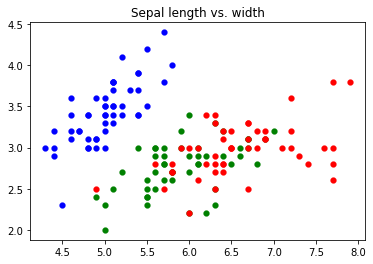

In [4]:
# printing features colored by species
from itertools import cycle
labels = np.unique(df['Species'])

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for label, col in zip(labels, colors):
    print(label, col)
    x = df[df['Species'] == label]['Sepal length']
    y = df[df['Species'] == label]['Sepal width']

    ax.scatter(x, y, c=col,  linewidth=0.2)
    
plt.title('Sepal length vs. width')
plt.show()

Number of estimated clusters : 3
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] 
 [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]] 
 3


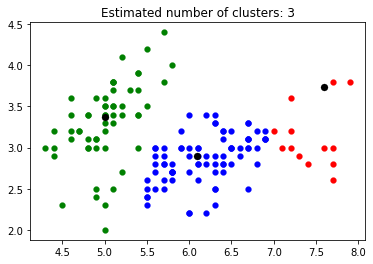

In [5]:
# MeanShift used to find the clusters
import matplotlib.pyplot as plt
from itertools import cycle

data_2d = df[['Sepal length', 'Sepal width']].values
labels, cluster_centers, n_clusters = my_mean_shift(data_2d)
print(labels,'\n',cluster_centers,'\n',n_clusters)
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col,  linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

# What else can I use this for?

For example for **image segmentation**: 

Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics. [Source]()https://en.wikipedia.org/wiki/Image_segmentation

<IPython.core.display.Javascript object>


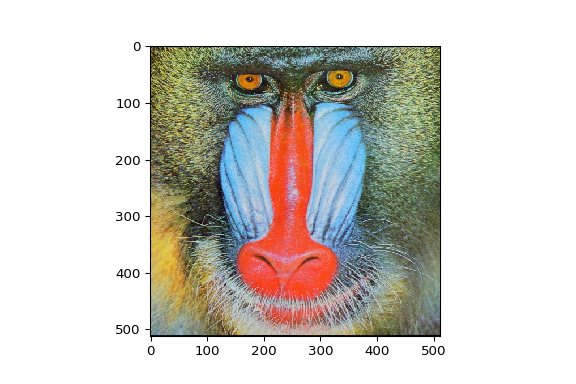

In [10]:
%matplotlib notebook
import os
import cv2
import webget

# url = 'https://github.com/opencv/opencv/raw/master/samples/data/rubberwhale2.png'
url = 'https://github.com/opencv/opencv/raw/master/samples/data/baboon.jpg'
# url = 'https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg'
webget.download(url)

img = cv2.imread(os.path.basename(url))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

plt.imshow(img, interpolation='none')

In [7]:
lab_image = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
img = cv2.medianBlur(lab_image, 5)
    
img_lst = img.reshape((img.shape[0] * img.shape[1], 3))
img_lst_orig = np.copy(img_lst) 

labels, cluster_centers, n_clusters = my_mean_shift(img_lst)

label_img = labels.reshape(height, width)
for l in range(n_clusters):
    img[label_img == l] = cluster_centers[l]

rgb_segments = cv2.cvtColor(img, cv2.COLOR_Lab2RGB)

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


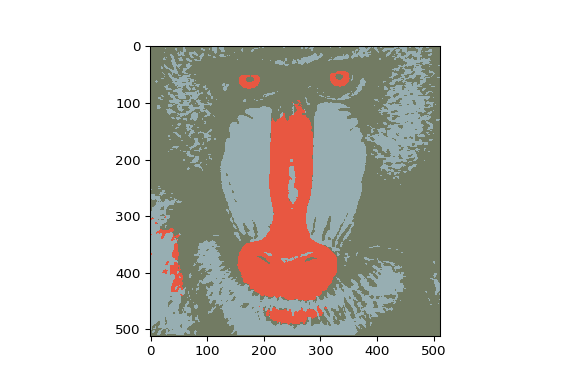

In [11]:
plt.figure() 
plt.imshow(rgb_segments, interpolation='none')

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


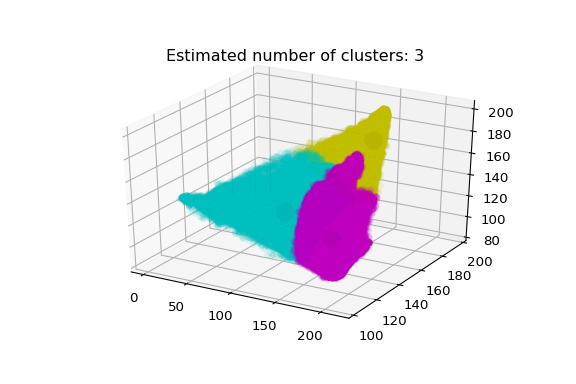

In [13]:
from itertools import cycle

labels, cluster_centers, n_clusters = my_mean_shift(img_lst_orig)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('cmybgr')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = img_lst_orig[my_members,0], img_lst_orig[my_members,1], img_lst_orig[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

In [14]:
print(cluster_centers)

[[128.63331918 120.5924825  140.09281334]
 [177.4323413  121.70040534 123.65599703]
 [144.54340266 183.3643416  170.54918745]]
